In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
deliveries = pd.read_csv("IPL data/deliveries.csv")
matches = pd.read_csv("IPL data/matches.csv")

In [3]:
total_score_df = deliveries.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()

In [4]:
total_score_df = total_score_df[total_score_df['inning']==1]

In [5]:
match_df = matches.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')

In [6]:
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings',
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [7]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

In [8]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [9]:
match_df = match_df[match_df['dl_applied'] == 0]

In [10]:
match_df = match_df.drop_duplicates()

In [11]:
match_df.shape

(626, 20)

In [12]:
match_df = match_df[['city', 'winner', 'total_runs', 'match_id']]

In [14]:
delivery_df = match_df.merge(deliveries,on='match_id')

In [15]:
delivery_df = delivery_df[delivery_df['inning'] == 2]

In [17]:
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

In [19]:
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

In [20]:
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

In [21]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [22]:
delivery_df

,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,Hyderabad,Mumbai Indians,152,11415,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,Hyderabad,Mumbai Indians,152,11415,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,Hyderabad,Mumbai Indians,152,11415,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,Hyderabad,Mumbai Indians,152,11415,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


In [23]:
delivery_df['playerr_dismissed'] = delivery_df['player_dismissed'].fillna("0")

In [25]:
delivery_df['playerr_dismissed'] = delivery_df['playerr_dismissed'].apply(lambda x:x if x == "0" else "1")

In [27]:
delivery_df['playerr_dismissed'] = delivery_df['playerr_dismissed'].astype('int')

In [29]:
delivery_df['playerr_dismissed'] = pd.to_numeric(delivery_df['playerr_dismissed'], errors='coerce')

In [31]:
wickets = delivery_df.groupby('match_id')['playerr_dismissed'].cumsum().values

In [32]:
delivery_df['wickets'] = 10 - wickets

In [33]:
delivery_df.head(40)

,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,batsman,...,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,playerr_dismissed,wickets
125,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,NaN,NaN,NaN,1,206,119,0,10
126,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,NaN,1,206,118,0,10
127,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,NaN,1,206,117,0,10
128,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,NaN,NaN,NaN,3,204,116,0,10
129,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,NaN,NaN,NaN,7,200,115,0,10
130,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,6,Mandeep Singh,...,0,4,NaN,NaN,NaN,11,196,114,0,10
131,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,1,CH Gayle,...,0,0,NaN,NaN,NaN,11,196,113,0,10
132,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,2,CH Gayle,...,0,0,NaN,NaN,NaN,11,196,112,0,10
133,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,3,CH Gayle,...,0,1,NaN,NaN,NaN,12,195,111,0,10
134,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,2,4,Mandeep Singh,...,0,0,NaN,NaN,NaN,12,195,110,0,10


In [34]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [35]:
delivery_df.head()

,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,playerr_dismissed,wickets,crr
125,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,NaN,NaN,NaN,1,206,119,0,10,6.0
126,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,NaN,NaN,NaN,1,206,118,0,10,3.0
127,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,NaN,NaN,NaN,1,206,117,0,10,2.0
128,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,NaN,NaN,NaN,3,204,116,0,10,4.5
129,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,NaN,NaN,NaN,7,200,115,0,10,8.4


In [36]:
delivery_df['rrr'] = ((delivery_df['runs_left']*6)/(delivery_df['balls_left'])) 

In [37]:
delivery_df.head()

,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,batsman,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,playerr_dismissed,wickets,crr,rrr
125,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,NaN,1,206,119,0,10,6.0,10.386555
126,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,NaN,1,206,118,0,10,3.0,10.474576
127,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,NaN,1,206,117,0,10,2.0,10.564103
128,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,NaN,3,204,116,0,10,4.5,10.551724
129,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,NaN,7,200,115,0,10,8.4,10.434783


In [38]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [40]:
delivery_df['result'] = delivery_df.apply(result, axis=1)

In [41]:
delivery_df.head()

,city,winner,total_runs_x,match_id,inning,batting_team,bowling_team,over,ball,batsman,...,dismissal_kind,fielder,current_score,runs_left,balls_left,playerr_dismissed,wickets,crr,rrr,result
125,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,NaN,NaN,1,206,119,0,10,6.0,10.386555,0
126,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,NaN,NaN,1,206,118,0,10,3.0,10.474576,0
127,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,NaN,NaN,1,206,117,0,10,2.0,10.564103,0
128,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,NaN,NaN,3,204,116,0,10,4.5,10.551724,0
129,Hyderabad,Sunrisers Hyderabad,207,1,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,NaN,NaN,7,200,115,0,10,8.4,10.434783,0


In [43]:
final_df = delivery_df[['batting_team', 'bowling_team', 'city', 'runs_left', 'balls_left', 'wickets', 'total_runs_x', 'crr', 'rrr', 'result']]

In [44]:
final_df = final_df.sample(final_df.shape[0])

In [45]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
36365,Kolkata Knight Riders,Rajasthan Royals,Ahmedabad,130,88,9,168,7.125,8.863636,0


In [56]:
final_df.dropna(inplace=True)

In [65]:
final_df = final_df[final_df['balls_left'] != 0]

In [81]:
final_df.to_csv('final_df.csv', index=False)

In [66]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
23572,Rajasthan Royals,Delhi Daredevils,Centurion,3,13,5,143,7.850467,1.384615
102643,Sunrisers Hyderabad,Royal Challengers Bangalore,Bangalore,74,64,9,166,9.857143,6.937500
11943,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,136,98,9,165,7.909091,8.326531
121874,Kings XI Punjab,Delhi Daredevils,Mohali,120,102,10,172,17.333333,7.058824
5505,Kolkata Knight Riders,Royal Challengers Bangalore,Bangalore,144,115,10,158,16.800000,7.513043
...,...,...,...,...,...,...,...,...,...
29366,Deccan Chargers,Delhi Daredevils,Durban,62,40,7,173,8.325000,9.300000
63783,Kolkata Knight Riders,Deccan Chargers,Cuttack,3,9,5,126,6.648649,2.000000
138433,Delhi Capitals,Kings XI Punjab,Mohali,12,4,0,175,8.431034,18.000000
103420,Delhi Daredevils,Kings XI Punjab,Pune,13,14,8,165,8.603774,5.571429


In [68]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer([
    ('trf', OneHotEncoder(sparse=False,drop='first'), ['batting_team', 'bowling_team', 'city'])
    ]
    ,remainder='passthrough')

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [69]:
pipe = Pipeline(steps=[
    ('step1', trf),
    ('step2', LogisticRegression(solver='liblinear'))
])

In [70]:
pipe.fit(X_train,y_train)

e:\Projects\IPL Analysis\venv\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [71]:
y_pred = pipe.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.8025089354544818

In [78]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target


In [79]:
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
10459,1,4,0,55.9,44.1
10467,2,8,0,50.8,49.2
10473,3,1,0,57.4,42.6
10479,4,7,1,69.2,30.8
10485,5,12,0,59.2,40.8
10491,6,13,0,46.9,53.1
10497,7,9,0,40.9,59.1
10505,8,15,0,27.1,72.9
10511,9,7,0,24.9,75.1
10518,10,17,0,13.6,86.4


Text(0.5, 1.0, 'Target-178')

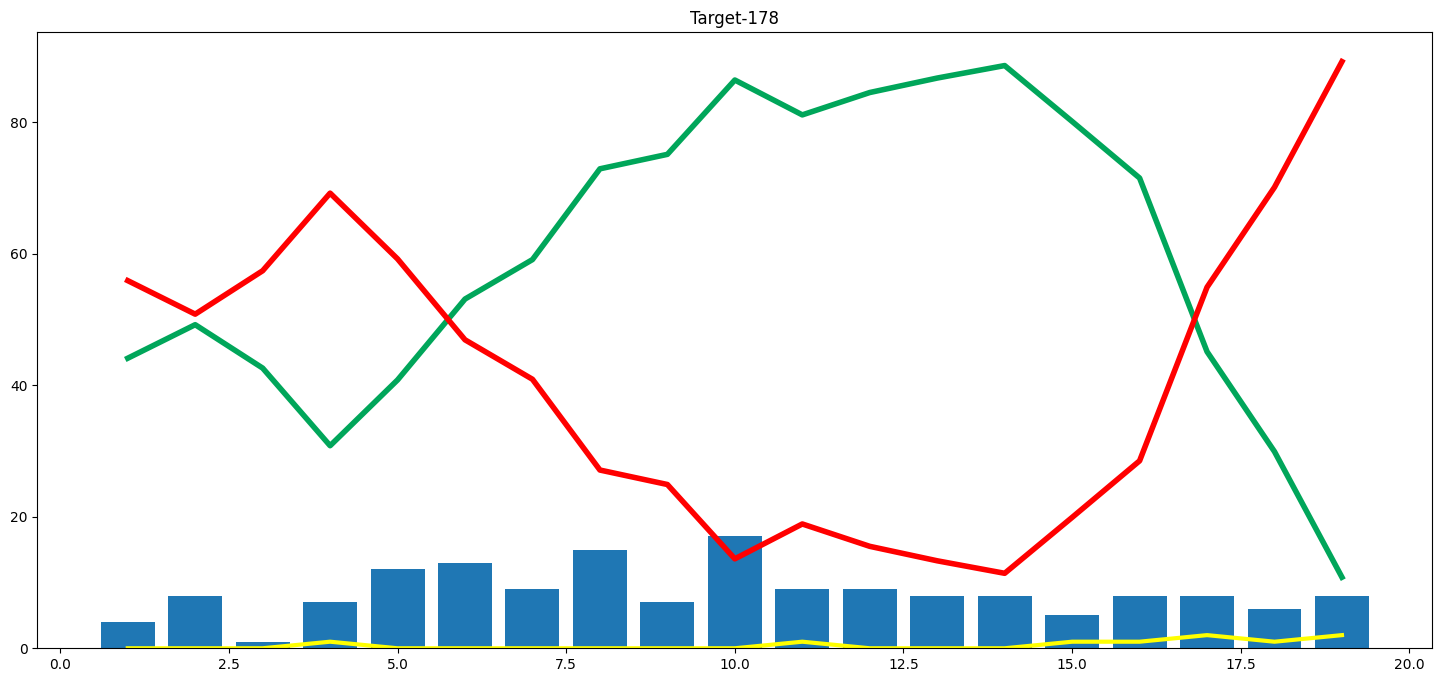

In [80]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [82]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [84]:
delivery_df['city'].unique()

array(['Hyderabad', 'Bangalore', 'Mumbai', 'Indore', 'Kolkata', 'Delhi',
       'Chandigarh', 'Jaipur', 'Chennai', 'Cape Town', 'Port Elizabeth',
       'Durban', 'Centurion', 'East London', 'Johannesburg', 'Kimberley',
       'Bloemfontein', 'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala',
       'Visakhapatnam', 'Pune', 'Raipur', 'Ranchi', 'Abu Dhabi',
       'Sharjah', nan, 'Mohali', 'Bengaluru'], dtype=object)

In [85]:
import pickle
pickle.dump(pipe,open('pipe.pkl', 'wb'))